In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("synthetic_rehab_data.csv")

In [53]:
print("Shape of dataframe:", df.shape)


Shape of dataframe: (747, 16)


In [54]:
df

,Patient ID,Age,Gender,Injury,Pain Level,Goal,Exercise 1,Exercise 2,Exercise 3,E1_sets,E1_reps,E2_sets,E2_reps,E3_sets,E3_reps,Improvement Score
0,9882,24,Female,Hip Arthritis,3,Reduced Pain (Hip),Range of Motion Exercises (hip),Glute Bridges,"Water Exercises (walking, aerobics)",2,12,1,12,4,8,4
1,2218,37,Female,Ankle Strain,6,Reduced Pain (Ankle),Balance Exercises (single leg stance),Calf Raises (seated),Ankle Circles (both directions),2,9,1,11,2,9,5
2,6001,37,Female,Plantar Fasciitis,6,Reduced Pain (Plantar Fascia),Towel Toe Curls,Short Foot Exercises,Plantar Fascia Massage,4,11,4,10,3,8,3
3,3925,61,Female,Hip Labral Tear,5,Increased Strength (Hip),Internal Rotations (light weight),Glute Bridges,Plank (high),4,11,2,12,4,9,9
4,6134,51,Female,Wrist Carpal Tunnel,0,Reduced Pain (Wrist),Wrist Extensor Stretches,Wrist Stretches,Wrist Flexor Stretches,3,10,3,10,4,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,9606,46,Female,Scoliosis,10,Improved Posture,Stretching Exercises,Core Strengthening Exercises,Pilates,4,11,3,10,4,9,3
743,3688,31,Male,Wrist Carpal Tunnel,9,Improved Flexibility (Wrist),Wrist Flexor Stretches,Wrist Extensor Stretches,Grip Strengthening Exercises,4,9,1,9,4,8,9
744,7511,36,Female,Scoliosis,4,Increased Core Strength,Back Extension Exercises,Pilates,Stretching Exercises,4,8,4,9,3,9,7
745,9073,37,Female,Hip Labral Tear,9,Increased Strength (Hip),External Rotations,Glute Bridges,Internal Rotations (light weight),2,11,4,10,4,9,5


In [55]:
min_improvement_score = 3
filtered_df = df[df['Improvement Score'] >= min_improvement_score]

In [56]:
df

,Patient ID,Age,Gender,Injury,Pain Level,Goal,Exercise 1,Exercise 2,Exercise 3,E1_sets,E1_reps,E2_sets,E2_reps,E3_sets,E3_reps,Improvement Score
0,9882,24,Female,Hip Arthritis,3,Reduced Pain (Hip),Range of Motion Exercises (hip),Glute Bridges,"Water Exercises (walking, aerobics)",2,12,1,12,4,8,4
1,2218,37,Female,Ankle Strain,6,Reduced Pain (Ankle),Balance Exercises (single leg stance),Calf Raises (seated),Ankle Circles (both directions),2,9,1,11,2,9,5
2,6001,37,Female,Plantar Fasciitis,6,Reduced Pain (Plantar Fascia),Towel Toe Curls,Short Foot Exercises,Plantar Fascia Massage,4,11,4,10,3,8,3
3,3925,61,Female,Hip Labral Tear,5,Increased Strength (Hip),Internal Rotations (light weight),Glute Bridges,Plank (high),4,11,2,12,4,9,9
4,6134,51,Female,Wrist Carpal Tunnel,0,Reduced Pain (Wrist),Wrist Extensor Stretches,Wrist Stretches,Wrist Flexor Stretches,3,10,3,10,4,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,9606,46,Female,Scoliosis,10,Improved Posture,Stretching Exercises,Core Strengthening Exercises,Pilates,4,11,3,10,4,9,3
743,3688,31,Male,Wrist Carpal Tunnel,9,Improved Flexibility (Wrist),Wrist Flexor Stretches,Wrist Extensor Stretches,Grip Strengthening Exercises,4,9,1,9,4,8,9
744,7511,36,Female,Scoliosis,4,Increased Core Strength,Back Extension Exercises,Pilates,Stretching Exercises,4,8,4,9,3,9,7
745,9073,37,Female,Hip Labral Tear,9,Increased Strength (Hip),External Rotations,Glute Bridges,Internal Rotations (light weight),2,11,4,10,4,9,5


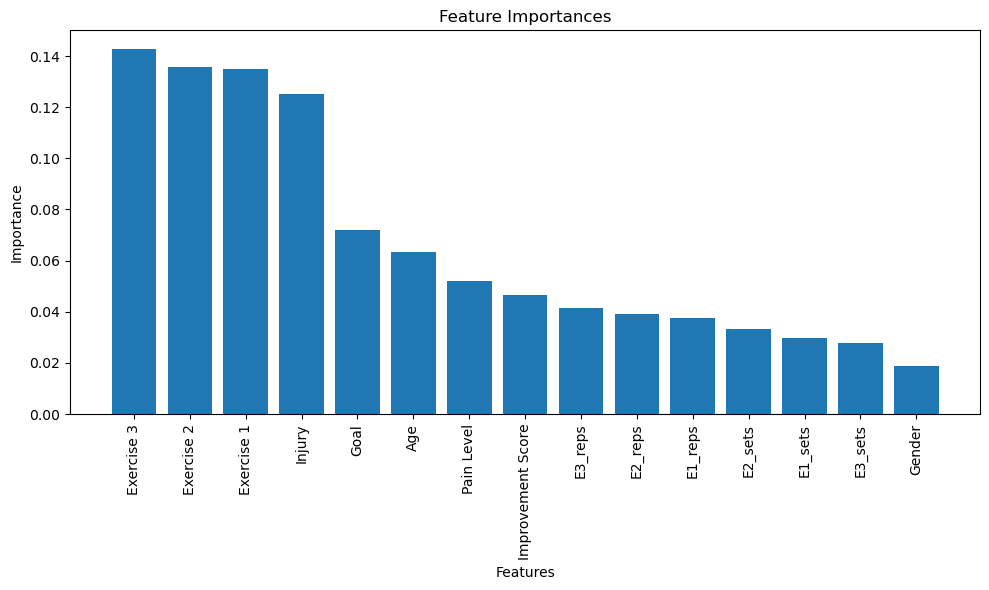

In [57]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [58]:
X = filtered_df.drop(columns=["Patient ID"]) 
y = filtered_df[["Exercise 1", "Exercise 2", "Exercise 3"]]

In [59]:
numerical_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
imputer = SimpleImputer(strategy="mean")
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

In [60]:
categorical_cols = [col for col in X.columns if not pd.api.types.is_numeric_dtype(X[col])]
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [61]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
Patient ID           0
Age                  0
Gender               0
Injury               0
Pain Level           0
Goal                 0
Exercise 1           0
Exercise 2           0
Exercise 3           0
E1_sets              0
E1_reps              0
E2_sets              0
E2_reps              0
E3_sets              0
E3_reps              0
Improvement Score    0
dtype: int64


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = RandomForestClassifier(n_estimators=120)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [64]:
y_pred = model.predict(X_test)

In [65]:
accuracies = {}
for i, exercise in enumerate(["Exercise 1", "Exercise 2", "Exercise 3"]):
    accuracies[exercise] = accuracy_score(y_test[exercise], y_pred[:, i])

In [66]:
overall_accuracy = sum(accuracies.values()) / len(accuracies)

print("Overall Accuracy:", overall_accuracy)
print("Individual Accuracies:")
for exercise, acc in accuracies.items():
    print(f"{exercise}: {acc}")

Overall Accuracy: 0.7399999999999999
Individual Accuracies:
Exercise 1: 0.7
Exercise 2: 0.7
Exercise 3: 0.82


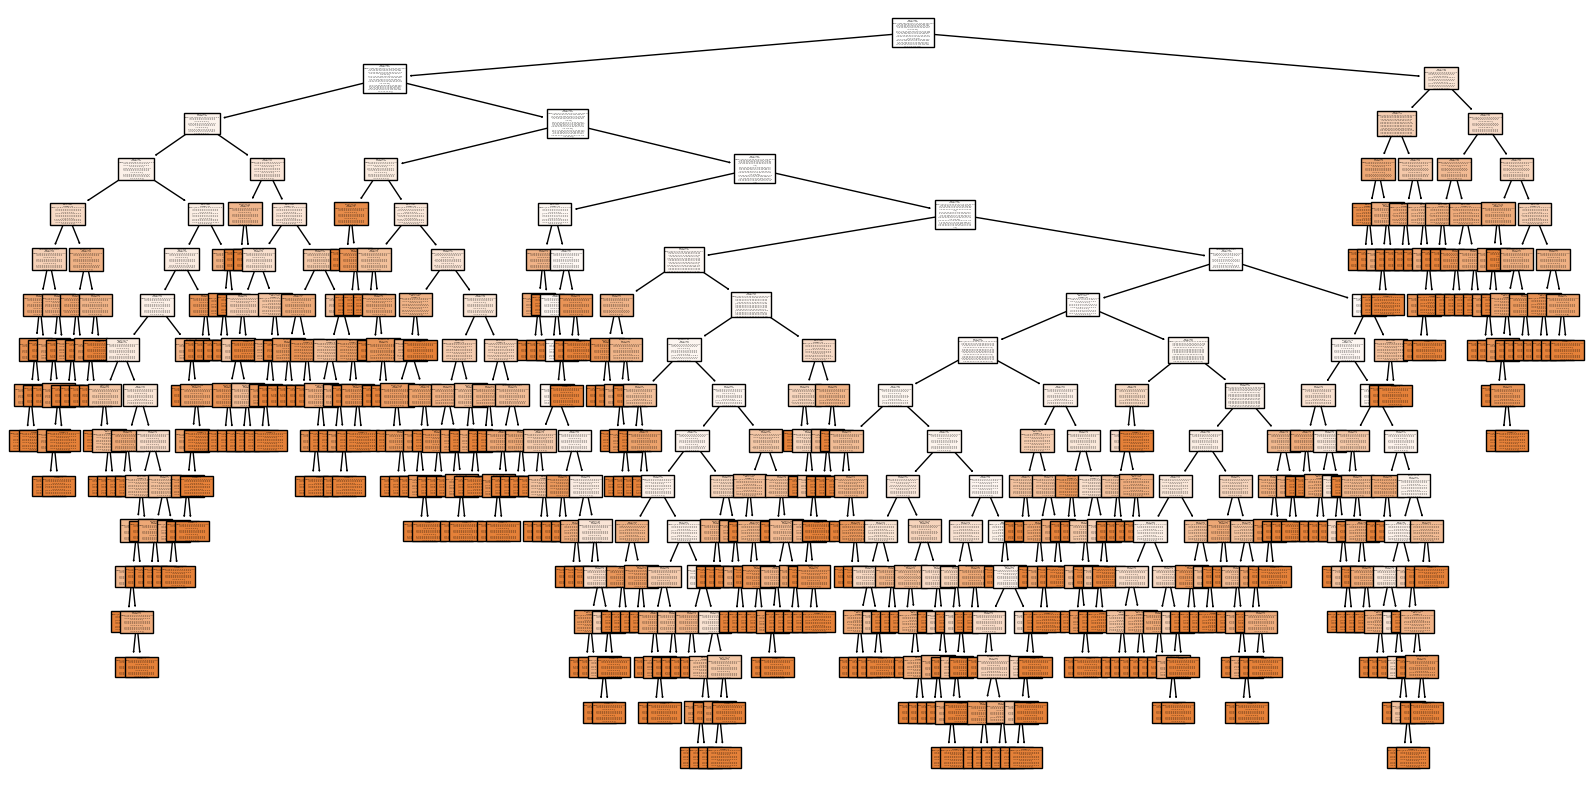

In [67]:
tree_to_visualize = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=X_train.columns, class_names=model.classes_, filled=True)
plt.show()